In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             confusion_matrix, classification_report, roc_curve, precision_recall_curve,
                             average_precision_score)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")

EDA

In [7]:
dataset=pd.read_csv("creditcard.csv")
dataset.head(7)   #top 7 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [8]:
dataset.shape    #size of dataset

(284807, 31)

In [9]:
dataset.columns  #shows all columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
dataset['Class'].value_counts()   #Class distribution  0:Genuine and 1: Fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
dataset['Class'].value_counts(normalize=True)*100   #class distribution in percentage


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [12]:
dataset.info()    #gives information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
dataset.isnull().sum()     #return sum of nulll/nan values present in different columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
print("Duplicate rows:", dataset.duplicated().sum())   #getting total sum of dublicate rows

Duplicate rows: 1081


In [15]:
dataset = dataset.drop_duplicates()  #removing dublicates from dataset

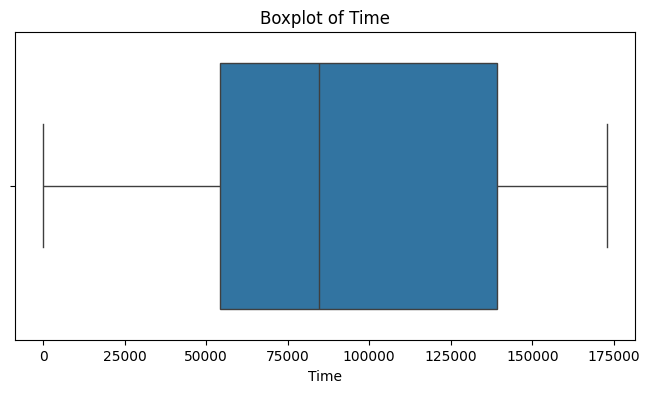

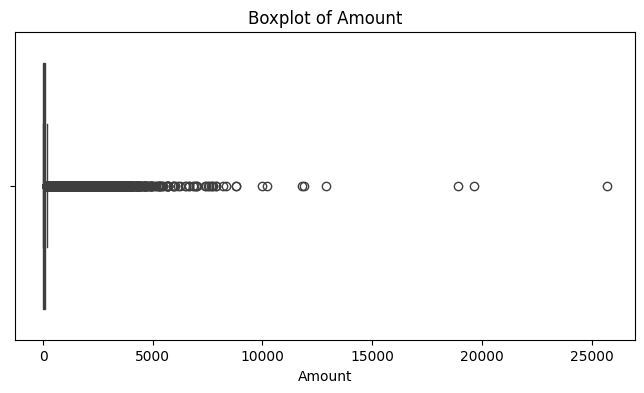

In [16]:
# Time Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=dataset['Time'])
plt.title("Boxplot of Time")
plt.show()

# Amount Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=dataset['Amount'])
plt.title("Boxplot of Amount")
plt.show()


Separate Features and Target

In [17]:
X = dataset.drop("Class", axis=1)
y = dataset["Class"]

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.3,random_state=42,stratify=y)

In [19]:
# Using RobustScaler because it handles outliers better and fitting scaler on training and testing data to amount and time
scaler = RobustScaler()

X_train[['Amount','Time']] = scaler.fit_transform(
    X_train[['Amount','Time']]
)

X_test[['Amount','Time']] = scaler.transform(
    X_test[['Amount','Time']]
)


In [20]:
#Handle Imbalance Using SMOTE since fraud cases are very few, model won’t learn fraud patterns properly
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({0: 198277, 1: 331})
After SMOTE: Counter({0: 198277, 1: 198277})


Training Model

In [21]:
lr = LogisticRegression(max_iter=1000, class_weight="balanced")

lr.fit(X_train_res, y_train_res)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]


In [22]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


Model Evaluation

In [ ]:
#Logistic Regression
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("PR-AUC:", average_precision_score(y_test, y_prob_lr))

Accuracy: 0.9727672172748419
Precision: 0.05152514427040396
Recall: 0.8802816901408451
F1 Score: 0.09735202492211838
ROC-AUC: 0.9655628532066055
PR-AUC: 0.6887904415970949


In [ ]:
#random Forest
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("PR-AUC:", average_precision_score(y_test, y_prob_rf))


Accuracy: 0.9994595737681806
Precision: 0.9137931034482759
Recall: 0.7464788732394366
F1 Score: 0.8217054263565892
ROC-AUC: 0.965335448484543
PR-AUC: 0.8104082197292329


In [ ]:
#Random Forest is better for Credit Card Fraud Detection due to very high Precision (91%), Good Recall (74%) ,
# Very high F1 Score (0.82), Better PR-AUC

[[84966    10]
 [   36   106]]


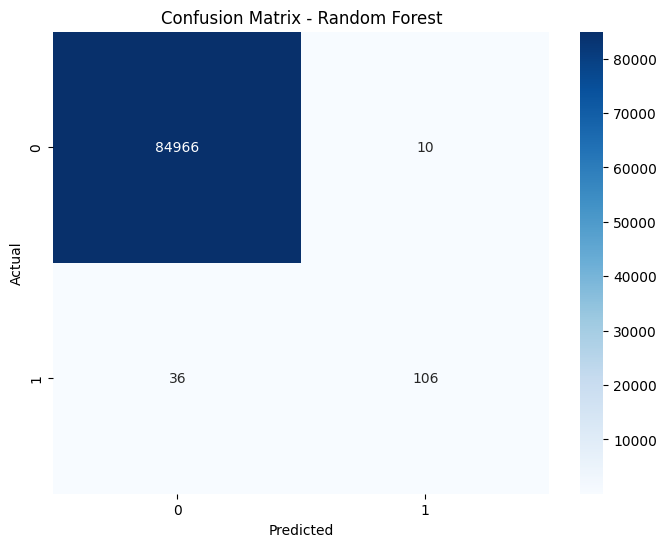

In [25]:
# Confusion metrix for fraud and genuine transection
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [26]:
#Using classification report for detailed information
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.91      0.75      0.82       142

    accuracy                           1.00     85118
   macro avg       0.96      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118



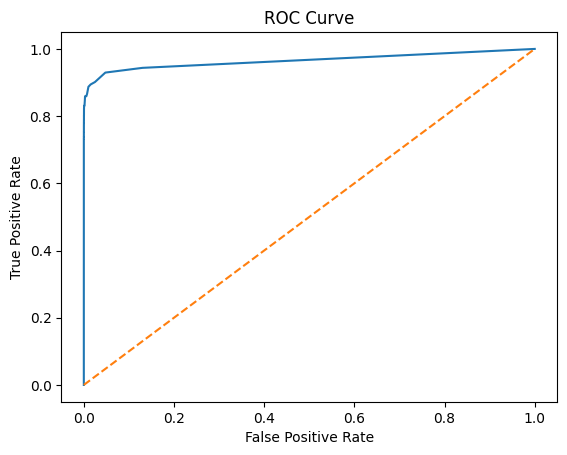

In [27]:
#Using ROC curve to show tradeoff between false and true positives rate
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


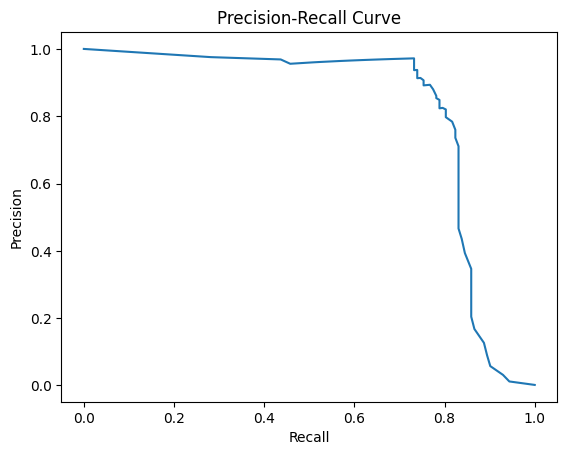

In [28]:
#using precision-recall cure for better visualization for rare fraud cases.
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [33]:
#Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf, X, y, cv=cv, scoring="roc_auc")

print("Cross-Validation ROC-AUC:", scores.mean())
print("Recall Scores:", scores)
print("Average Recall:", scores.mean())


Cross-Validation ROC-AUC: 0.9488452286672858
Recall Scores: [0.94062129 0.96139127 0.93993496 0.94595271 0.95632592]
Average Recall: 0.9488452286672858
